In [ ]:
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_excel('/content/drive/MyDrive/KPI_train_new.xlsx', index_col=0)
df_train

,label,year,month,weekday,hour,weekend,daylight,kpi_id,win_2_mean_value,win_3_mean_value,win_6_mean_value,win_6_std_value,win_6_skew_value,win_6_kurt_value,win_6_q25_value,win_6_q50_value,win_6_q75_value,win_12_mean_value,win_12_std_value,win_12_skew_value,win_12_kurt_value,win_12_q25_value,win_12_q50_value,win_12_q75_value,x_y_value_1,x_y_value_24,x_y_value_48,x_y_value_144,x_y_value_168,x_y_win_2_mean_value_1,x_y_win_2_mean_value_24,x_y_win_2_mean_value_48,x_y_win_2_mean_value_144,x_y_win_2_mean_value_168,x_y_win_3_mean_value_1,x_y_win_3_mean_value_24,x_y_win_3_mean_value_48,x_y_win_3_mean_value_144,x_y_win_3_mean_value_168,expa_mean,expa_std,win_3_mean,trend_win3,z_score
value,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41062.000000,0,2018,12,7,0,1,1,0,41344.500000,41522.000000,41946.500000,561.820167,-0.492438,0.196486,41689.500000,42010.500000,42258.000000,42207.416667,489.034942,-1.258341,1.550799,42077.250000,42266.500000,42547.750000,565.000000,30.000000,84.000000,633.000000,7346.000000,407.500000,54.500000,234.500000,488.000000,7063.500000,360.666667,78.333333,292.666667,505.333333,0.000000,42281.207101,1060.623002,41522.000000,-460.000000,1.038317
40928.000000,0,2018,12,7,1,1,1,0,40995.000000,41205.666667,41655.666667,562.182414,-0.345635,-1.821184,41203.250000,41752.000000,42077.250000,42098.333333,612.294393,-0.987645,-0.105631,41814.500000,42243.000000,42547.750000,134.000000,0.000000,88.000000,353.000000,6529.000000,349.500000,15.000000,86.000000,493.000000,6937.500000,316.333333,36.333333,185.666667,443.000000,6726.833333,42273.247059,1062.561245,41205.666667,-277.666667,0.961162
40915.000000,0,2018,12,7,2,1,1,0,40921.500000,40968.333333,41425.500000,529.328915,0.337669,-2.180977,40961.500000,41344.500000,41814.500000,41992.083333,699.373415,-0.639919,-1.237153,41485.750000,42220.000000,42547.750000,13.000000,2.000000,14.000000,296.000000,5857.000000,73.500000,1.000000,37.000000,324.500000,6193.000000,237.333333,9.333333,52.666667,427.333333,6577.333333,42265.304094,1064.510929,40968.333333,-53.333333,0.903275
40846.000000,0,2018,12,7,3,1,1,0,40880.500000,40896.333333,41209.166667,433.525739,1.001611,-1.077779,40918.250000,40995.000000,41485.750000,41851.250000,748.331978,-0.269897,-1.741423,41028.500000,42010.500000,42523.000000,69.000000,4.000000,16.000000,273.000000,5327.000000,41.000000,3.000000,15.000000,284.500000,5592.000000,72.000000,2.000000,19.333333,307.333333,5904.333333,42257.052326,1066.896660,40896.333333,-50.333333,0.885714
40800.000000,0,2018,12,7,4,1,1,0,40823.000000,40853.666667,41029.666667,305.881459,2.015751,4.266029,40863.250000,40921.500000,41028.500000,41702.666667,766.619063,0.080060,-1.829722,40924.750000,41752.000000,42347.750000,46.000000,5.000000,2.000000,286.000000,3180.000000,57.500000,4.500000,7.000000,279.500000,4253.500000,42.666667,3.666667,9.333333,285.000000,4788.000000,42248.630058,1069.543046,40853.666667,-53.666667,0.875307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980.530954,1,2019,1,4,10,0,0,58,1400.720967,1648.859467,1339.139478,655.257780,-0.089253,-1.981911,882.258246,1368.082919,1802.090826,1013.698411,596.032223,0.878396,-0.624007,542.092974,825.530954,1338.519657,840.380026,590.511973,675.614549,471.493899,358.067780,582.302756,242.441257,166.434703,70.020334,192.116585,252.809911,588.925140,195.439977,175.781594,556.254708,1297.537903,557.014190,1648.859467,-668.328513,0.602373
34.024575,1,2019,1,1,18,0,0,77,38.393982,40.059146,40.666410,5.718427,-1.613280,29.567628,40.701416,41.776184,43.165933,44.283057,7.737419,-0.569271,-7.168653,41.093075,43.748462,47.130831,10.671476,15.115342,12.391573,7.517272,9.638575,4.682450,7.832394,6.375894,2.481924,3.664574,3.276212,5.390387,4.456188,1.859363,3.563052,41.415433,10.499364,40.059146,-6.034571,-0.102082
2157.467904,1,2019,1,7,13,1,0,50,1078.733952,719.155968,359.577984,880.782584,2.4

In [ ]:
df_test = pd.read_excel('/content/drive/MyDrive/KPI_test_new.xlsx', index_col=0)

In [ ]:
df_test.reset_index(inplace=True)
df_train.reset_index(inplace=True)

In [ ]:
train_X = df_train.drop('label', axis=1)
train_Y = df_train['label']
test_X = df_test.drop('label', axis=1) #17136筆test data
test_Y = df_test['label'] #394個異常data

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold,TimeSeriesSplit
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import make_scorer,f1_score

In [ ]:
xgb_parrams={
    'booster':'gbtree',
    'objective':'binary:logistic',
    'eval_metric':'error',
     'colsample_bytree': 0.30801698649621306,
     'gamma': 0.27969503858326235,
     'learning_rate': 0.04341140878653162,
     'max_depth': 7,
     'reg_alpha': 0.38161740307145836,
     'reg_lambda': 0.3109582304218081,
     'min_child_weight ': 3,
     'subsample': 0.8
            }
xgb2 = XGBClassifier(**xgb_parrams)

In [ ]:
xgb2.fit(train_X, train_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.30801698649621306,
              eval_metric='error', gamma=0.27969503858326233,
              learning_rate=0.04341140878653162, max_delta_step=0, max_depth=7,
              min_child_weight=1, min_child_weight =3, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0,
              reg_alpha=0.38161740307145836, reg_lambda=0.3109582304218081,
              scale_pos_weight=1, seed=None, silent=None, subsample=0.8,
              verbosity=1)

In [ ]:
pre = xgb2.predict(test_X)

In [ ]:
f1_score(test_Y, pre) #0.683

0.6838156484458735

In [ ]:
confusion_matrix(test_Y,pre)

array([[16522,   220],
       [   75,   319]])

In [ ]:
from sklearn.metrics import classification_report
print("report:\n",classification_report(test_Y,pre))

report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     16742
           1       0.58      0.79      0.67       394

    accuracy                           0.98     17136
   macro avg       0.79      0.89      0.83     17136
weighted avg       0.99      0.98      0.98     17136



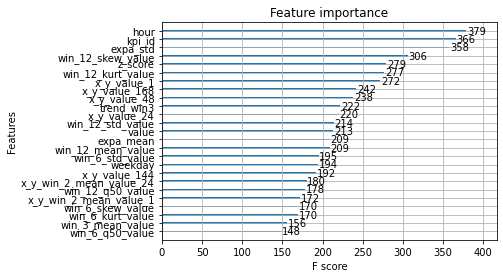

In [ ]:
xgb.plot_importance(xgb2, max_num_features=25)

In [ ]:
f1_score(test_Y, pre)

0.6702355460385439